In [2]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [3]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import word_tokenize
from google.colab import files
from nltk.util import ngrams
import pandas as pd
import string
import nltk
import re

In [4]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
df = pd.read_excel("reviews_hotel.xlsx")

In [15]:
print("Jumlah total ulasan:", len(df))
print("\nContoh 5 data awal:")
display(df.head())

Jumlah total ulasan: 1216

Contoh 5 data awal:


,review
0,"Pelayanannya ramah bgtt, fasilitas kamar juga ..."
1,Baru kali ini sangat kecewa dengan pelayanan h...
2,Liburan menyenangkan di jogja\nStay di hotel y...
3,lokasinya juga mantap dekat dengan bandara dan...
4,Saya merekomendasikan anda untuk menginap di h...


**casefolding**

In [16]:
def casefolding(teks):
    teks = teks.lower()
    teks = re.sub(r"http\S+|www\S+", "", teks)
    teks = re.sub(r"[^a-zA-Z\s]", " ", teks)
    teks = re.sub(r"\s+", " ", teks).strip()
    return teks

df["Casefold"] = df["review"].apply(casefolding)
df[["review", "Casefold"]].tail(10)


,review,Casefold
1206,The best pengalaman menginap dan semua makanan...,the best pengalaman menginap dan semua makanan...
1207,Lokasi hotel yang strategis untuk keperluan bi...,lokasi hotel yang strategis untuk keperluan bi...
1208,"Fasilitasnya luar biasa, dari kamar, pelayanan...",fasilitasnya luar biasa dari kamar pelayanan d...
1209,"lokasi di pusat kota sangat strategis, service...",lokasi di pusat kota sangat strategis services...
1210,"Makanannya enak, fasilitas lengkap, kamar cuku...",makanannya enak fasilitas lengkap kamar cukup ...
1211,Kalau bisa tiap lift ada pemandunya (guide) un...,kalau bisa tiap lift ada pemandunya guide untu...
1212,"Menu sarapan nya sangat lengkap, rasa nya juga...",menu sarapan nya sangat lengkap rasa nya juga ...
1213,"tempat renangnya bagus, di atas.\nmakanan okee...",tempat renangnya bagus di atas makanan okee ba...
1214,"Sangattt rekomended untuk kesini, makanannya e...",sangattt rekomended untuk kesini makanannya en...
1215,"Kamar bersih, nyaman, wifi lancar, Breakfast m...",kamar bersih nyaman wifi lancar breakfast menu...


**cleaning**

In [17]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

df['cleaned'] = df['Casefold'].apply(clean_text)
print("HASIL CLEANING (hapus tanda baca, angka, simbol):")
display(df[['Casefold', 'cleaned']].head())

HASIL CLEANING (hapus tanda baca, angka, simbol):


,Casefold,cleaned
0,pelayanannya ramah bgtt fasilitas kamar juga o...,pelayanannya ramah bgtt fasilitas kamar juga o...
1,baru kali ini sangat kecewa dengan pelayanan h...,baru kali ini sangat kecewa dengan pelayanan h...
2,liburan menyenangkan di jogja stay di hotel yg...,liburan menyenangkan di jogja stay di hotel yg...
3,lokasinya juga mantap dekat dengan bandara dan...,lokasinya juga mantap dekat dengan bandara dan...
4,saya merekomendasikan anda untuk menginap di h...,saya merekomendasikan anda untuk menginap di h...


**tokenizing**

In [20]:
df['token'] = df['cleaned'].apply(word_tokenize)
print("HASIL TOKENIZING (kalimat dipisah jadi kata):")
display(df[['Casefold', 'cleaned', 'token']].head())


HASIL TOKENIZING (kalimat dipisah jadi kata):


,Casefold,cleaned,token
0,pelayanannya ramah bgtt fasilitas kamar juga o...,pelayanannya ramah bgtt fasilitas kamar juga o...,"[pelayanannya, ramah, bgtt, fasilitas, kamar, ..."
1,baru kali ini sangat kecewa dengan pelayanan h...,baru kali ini sangat kecewa dengan pelayanan h...,"[baru, kali, ini, sangat, kecewa, dengan, pela..."
2,liburan menyenangkan di jogja stay di hotel yg...,liburan menyenangkan di jogja stay di hotel yg...,"[liburan, menyenangkan, di, jogja, stay, di, h..."
3,lokasinya juga mantap dekat dengan bandara dan...,lokasinya juga mantap dekat dengan bandara dan...,"[lokasinya, juga, mantap, dekat, dengan, banda..."
4,saya merekomendasikan anda untuk menginap di h...,saya merekomendasikan anda untuk menginap di h...,"[saya, merekomendasikan, anda, untuk, menginap..."


**normalisasi**

In [43]:
normalisasi = {
    'yg': 'yang', 'sy': 'saya', 'sdh': 'sudah', 'udh': 'sudah', 'dgn': 'dengan', 'dg': 'dengan',
    'aja': 'saja', 'nih': 'ini', 'sih': '', 'sihh': '', 'nihh': 'ini', 'ajaa': 'saja', 'eh': '',
    'ehh': '', 'ehhh': '', 'dong': '', 'tp': 'tapi', 'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak',
    'knp': 'kenapa', 'trs': 'terus', 'bgt': 'sangat', 'nya': '', 'rp': 'rupiah', 'bgtt': 'sangat',
    'bgttt': 'sangat', 'jgn': 'jangan', 'bgtttt': 'sangat', 'sii': '', 'si': '', 'siii': '',
    'sihh': '', 'sihhh': '', 'jg': 'juga', 'aj': 'saja', 'tpi': 'tapi', 'tuu': 'itu', 'tuuu': 'itu',
    'tuhh': 'itu', 'jgnn': 'jangan', 'loh': '', 'kok': '', 'lah': '', 'deh': '', 'kan': '',
    'ya': 'ya', 'yaa': 'ya', 'yaaa': 'ya', 'kann': '', 'yh': 'ya', 'yhh': 'ya', 'yhhh': 'ya',
    'tuh': 'itu', 'pun': '', 'pd': 'pada', 'blm': 'belum', 'kl': 'kalau', 'klo': 'kalau',
    'klu': 'kalau', 'utk': 'untuk', 'biar': 'biar', 'mah': '', 'dehh': '', 'dehhh': ''
}

def normalize_tokens(tokens):
    new_tokens = [normalisasi.get(w, w) for w in tokens if normalisasi.get(w, w) != '']
    return new_tokens

df['normalized'] = df['token'].apply(normalize_tokens)
df['normalized_text'] = df['normalized'].apply(lambda x: ' '.join(x))

display(df[['token', 'normalized', 'normalized_text']].head())


,token,normalized,normalized_text
0,"[pelayanannya, ramah, bgtt, fasilitas, kamar, ...","[pelayanannya, ramah, sangat, fasilitas, kamar...",pelayanannya ramah sangat fasilitas kamar juga...
1,"[baru, kali, ini, sangat, kecewa, dengan, pela...","[baru, kali, ini, sangat, kecewa, dengan, pela...",baru kali ini sangat kecewa dengan pelayanan h...
2,"[liburan, menyenangkan, di, jogja, stay, di, h...","[liburan, menyenangkan, di, jogja, stay, di, h...",liburan menyenangkan di jogja stay di hotel ya...
3,"[lokasinya, juga, mantap, dekat, dengan, banda...","[lokasinya, juga, mantap, dekat, dengan, banda...",lokasinya juga mantap dekat dengan bandara dan...
4,"[saya, merekomendasikan, anda, untuk, menginap...","[saya, merekomendasikan, anda, untuk, menginap...",saya merekomendasikan anda untuk menginap di h...


**Stop Word Remove (filtering)**

In [46]:
# Buat stopword list dari Sastrawi
stop_factory = StopWordRemoverFactory()
stop_words = set(stop_factory.get_stop_words())

def remove_stopwords_per_token(tokens):
    return [w for w in tokens if w not in stop_words]

# Terapkan ke kolom normalized
df["filtered"] = df["normalized"].apply(remove_stopwords_per_token)
# df["filtered_text"] = df["filtered"].apply(lambda x: ' '.join(x))

# Tampilkan hasil
display(df[["normalized", "filtered"]].head())

# Simpan ke CSV
df[["normalized", "filtered"]].to_csv("norm_n_filtered.csv", index=False)

,normalized,filtered
0,"[pelayanannya, ramah, sangat, fasilitas, kamar...","[pelayanannya, ramah, sangat, fasilitas, kamar..."
1,"[baru, kali, ini, sangat, kecewa, dengan, pela...","[baru, kali, sangat, kecewa, pelayanan, hotel,..."
2,"[liburan, menyenangkan, di, jogja, stay, di, h...","[liburan, menyenangkan, jogja, stay, hotel, lu..."
3,"[lokasinya, juga, mantap, dekat, dengan, banda...","[lokasinya, mantap, dekat, bandara, tempat, te..."
4,"[saya, merekomendasikan, anda, untuk, menginap...","[merekomendasikan, menginap, hotel, pelayanann..."


**remove duplikat**

In [47]:
before = len(df)
df = df.drop_duplicates(subset=['filtered'])
after = len(df)
print(f"Duplikat dihapus: {before - after} baris")

Duplikat dihapus: 0 baris


**stemming**

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_per_token(tokens):
    return [stemmer.stem(w) for w in tokens]

df["stemmed_tokens"] = df["filtered"].apply(stem_per_token)
# df["stemmed_text"] = df["stemmed_tokens"].apply(lambda x: " ".join(x))


In [49]:
df[["stemmed_tokens"]].to_csv("stemmed_only.csv", index=False)

**cleaning lagi (KBBI)**

In [146]:
import pandas as pd

# Baca file kamus kata baku
kamus_df = pd.read_csv("dictionary_CSV.csv")

# pastikan kolomnya benar
kamus_baku = set(kamus_df['word'].tolist())
print(f"Total kata baku: {len(kamus_baku)}")

Total kata baku: 102552


In [241]:
stop_tambahan = {
    'hotel','kamar','layan','makan','sarap','menu','lokasi','tempat','fasilitas', 'restoran','strategis','malam','pagi','siang','hari','ruang','anak','kolam',
    'renang','bintang','parkir','lift','resepsionis','ac','wifi','staf','staff','sekali','sangat','cukup','juga','semua','nya','yang','lebih','itu','ini',
    'jadi','akan','ada','buat','karena','agar','pada','dari','dan','dengan','untuk','ke','di','ya','aja','loh','dong','mah','deh','lah','sini','kalo','kalau','bisa',
    'bagi','atas','saat','waktu','dalam','terima','kasih','lumayan','cuma','lagi','sudah','udah','selalu','masih','kadang','mungkin','beberapa','setiap','inap',
    'pilih','dekat','kota','luas','letak','pusat','tengah','depan','belakang','samping','lantai','atas','bawah','variasi','varian','variatif','macam','tambah','kurang',
    'dapat','dapatkan','minta','perlu','harap','butuh','mau','datang','tinggal','nginap','checkin','checkout','kembali','ulang','lama','baru','dulu','sekarang',
    'akhir','pertama','kedua','terakhir','orang','tamu','keluarga','suasana','acara','wisata','kerja','libur','tahun','bulan','minggu','jam','sore','minum','mandi',
    'pelayan','meja','kursi','toilet','tv','pintu','air','panas','dingin','tidur','kasur','lemari','handuk','bantal','selimut','sabun','shampo','gelas','remote',
    'lampu','stopkontak','kunci','jendela','tirai','muas','sih','nih','kok','kan','terlalu','agak','area','jalan','pinggir','sekitar','bandara','masuk','keluar',
    'luar','dalam','kantor','utama','gedung','bantu','bikin','sedia','pakai','guna','tugas','cek','check','balik','pindah','temu','lihat','pernah','pokok','utama',
    'paling','salah','satu','tiap','sering','moga','biar','udah','lagi','kalau','kelas','standar','profesional','fungsi','desain','interior','eksterior','konsep','model','jenis','tipe','harga','biaya','nilai','proses','kendala','mbak','mas','bapak',
    'ibu','petugas','karyawan','pegawai','pengunjung','pihak','kita','mereka','kami','saya','aku','dia','anda','sama','pun','lain','lainnya','dll','dst','semoga','harap','moga','jadi','pernah','jarang','kayak','mirip','nyaris','tetap','tetep',
    'sebelum','sesudah','setelah','hingga','supaya','buat','beri','kasih','suka','lihat','tahu','coba','mau','punya','miliki','isi','bawa','gunakan','jumpa','mulai','berhenti','lanjut','selesai','pergi','akses','saji','buah','khas',
    'masakan','nikmat','mewah','komplit','mudah','cocok','cepat','lama','langsung','perlu','sedikit','besar','bagai','kali','padahal','seluruh','tugas','sopan','alami','situasi','kena','bikin','seru','beli','pulang','bantu','kerja','situ',
    'dekat','penuh','panas','dingin','harapn','sayang','utama','komentar','tutup','masalah','masuk','balik','depan','belakang','kemarin','selesai','sekitar','pernah','tiap','agam', 'lena', 'alam','jaga', 'alhamdulillah', 'lalu', 'iftar','perhati','front','mana','giat','lupa',
    'telur','ayam','alhamdulillah','tuju','prima','sapa','walaupun','asin','nasi','goreng','makin','lidah','kaget','tiga','betul','kopi','milik','maupun','hampir',
    'sungguh','duduk','buka','motor','jamu','siapa','ikan','banding','berat','tahan','hidang','rapat','manis','stasiun','arah','belah','boleh','tangan','bisnis','menit','lima',
    'susah','sambut','komplain','tania','kata','penting','bakal','entah','laku','masa','tembok','bayar','mana','banyak','rasa','sibuk','mobil','makin','terus','cuman','habis','gudeg','malah','jangan','sendiri',
    'rokok','saran','tarik','awal','rombong','cita','rasa','empuk','belanja','belum','simpan', 'parah', 'klik', 'suara', 'beda', 'ganti', 'jajan', 'segi', 'lepas', 'rangka', 'kaca', 'alat', 'bilang',
    'sapa','sisa','plaza','dinas','tawar','sempat','telpon','guling','lupa','botol','aroma','senyum', 'raya', 'neng', 'setrika','nama', 'bingung',
    'teman', 'bubur', 'mohon', 'nyala', 'tadi', 'salam', 'atur', 'posisi', 'nusantara', 'aneka', 'ringan', 'gunung', 'bumbu', 'sudut', 'alat', 'seperti', 'piring', 'hampir', 'candi', 'ragu', 'ukur', 'bareng',
    'hotel','kamar','layan','makan','sarap','menu','lokasi','tempat','fasilitas','restoran','strategis','malam','pagi','siang','hari','ruang','anak','kolam','renang','bintang','parkir','lift','resepsionis','ac','wifi','staf','staff',
    'sekali','sangat','cukup','juga','semua','nya','yang','lebih','itu','ini','jadi','akan','ada','buat','karena','agar','pada','dari','dan','dengan','untuk','ke','di','ya','aja','loh','dong','mah','deh','lah','sini','kalo','kalau','bisa','bagi','atas','saat','waktu','dalam','terima','kasih','lumayan','cuma','lagi',
    'sudah','udah','selalu','masih','kadang','mungkin','beberapa','setiap','inap','pilih','dekat','kota','luas','letak','pusat','tengah','depan','belakang','samping',
    'lantai','atas','bawah','variasi','varian','variatif','macam','tambah','kurang','dapat','dapatkan','minta','perlu','harap','butuh','mau','datang','tinggal','nginap','checkin','checkout','kembali','ulang','lama','baru','dulu','sekarang','akhir','pertama','kedua','terakhir','orang','tamu','keluarga','suasana','acara',
    'wisata','kerja','libur','tahun','bulan','minggu','jam','sore','minum','mandi','pelayan','meja','kursi','toilet','tv','pintu','air','panas','dingin','tidur','kasur','lemari','handuk','bantal','selimut','sabun','shampo','gelas','remote',
    'lampu','stopkontak','kunci','jendela','tirai','muas','sih','nih','kok','kan','terlalu','agak','area','jalan','pinggir','sekitar','bandara','masuk','keluar','luar','dalam','kantor','utama','gedung','bantu','bikin','sedia','pakai','guna',
    'tugas','cek','check','balik','pindah','temu','lihat','pernah','pokok','utama', 'paling','salah','satu','tiap','sering','moga','biar','udah','lagi','kalau','kelas','standar','profesional','fungsi','desain','interior','eksterior','konsep','model',
    'jenis','tipe','harga','biaya','nilai','proses','kendala','mbak','mas','bapak','ibu','petugas','karyawan','pegawai','pengunjung','pihak','kita','mereka','kami',
    'saya','aku','dia','anda','sama','pun','lain','lainnya','dll','dst','semoga','harap','moga','jadi','pernah','jarang','kayak','mirip','nyaris','tetap','tetep',
    'sebelum','sesudah','setelah','hingga','supaya','buat','beri','kasih','suka','lihat','tahu','coba','mau','punya','miliki','isi','bawa','gunakan','jumpa','mulai','berhenti','lanjut','selesai','pergi','akses','saji','buah','khas',
    'masakan','nikmat','mewah','komplit','mudah','cocok','cepat','langsung','perlu','sedikit','besar','bagai','kali','padahal','seluruh','tugas','sopan','alami','situasi','kena','bikin','seru','beli','pulang','bantu','kerja','situ','dekat',
    'penuh','panas','dingin','harapn','sayang','utama','komentar','tutup','masalah','masuk','balik','depan','belakang','kemarin','selesai','sekitar','pernah','tiap',
    'agam','banget','biasa','mantap','pesan','jauh','kecil','order','super','umum','sukses','tenang','unik','layak','cepat','tepat','long','plus','serta','benar','kalau','nyata','jelas','betah','sempit','hilang','mahal','murah','tingkat', 'segala', 'data', 'kondisi', 'aktivitas', 'sistem',
    'informasi', 'hal', 'karena', 'juga', 'agar', 'dalam', 'pada', 'sudah', 'masih', 'jadi', 'serta', 'lokal', 'tradisional', 'budaya','khas', 'barang', 'fasilitas', 'kamar', 'lokasi', 'tempat', 'harga','sarapan', 'konfirmasi', 'pesan', 'tanggap', 'respon', 'layanan',
    'proses', 'lengkap', 'fasilitas', 'modern', 'plastik','kunjung', 'khusus', 'jangkau', 'kualitas', 'hal', 'kamar', 'balkon', 'rumah', 'point', 'suhu', 'selera', 'ragam', 'soto', 'lauk', 'superior','sofa', 'ornamen', 'sistem', 'transportasi', 'tangga', 'bangun', 'info',
    'ruang', 'langganan', 'wanita', 'pria', 'tempat', 'tanggal', 'makan', 'daging', 'apabila', 'sejak', 'tentu', 'memang', 'bila', 'juga', 'sangat','sama', 'saat', 'maka', 'agar', 'dengan', 'untuk', 'pada', 'dari',
    'paket','trip','satpam','tugas','sinyal','jarak','lobi','langgan', 'barang','alat','sistem','ruang','tempat','kamar','hotel','platinum','operator','konsumen','pelayanan','sopir','suami',
    'istri','gita','sana','nyonya','favorit','puding','asap','gosok','bakso','tepung','telur','roti','dadar','ikan','lauk','nyenyak','tempe','nasi','parkir', 'siap','aman','kamar','ruangan','tempat','poin','sopir','sistem',
    'foto','daerah','alat','pelayanan','barang','keliling','bahan','produk','makanan','minuman','dapur','lombok','pakai','tiba','masuk','pesan','tanya','tunggu','ambil','kirim','potong','beli','bayar','pilih','cek','hasil','datang','tinggal','operator',
    'istimewa','wajib','panjang','sebut','hingga','bareng','sekitar', 'bagian','sisi','pintu','kaca','rame','keras','sedang','panas','adem','terang','gelap','panjang','cepat','lambat','detail','minus','plus','poin','siap','ramai','tenang','sepi','keras','panas','gelap','terang','hijau',
    'putih','biru','luas','kecil','besar','lama','baru','tinggi','rendah', 'cepat','lambat','dekat','jauh','dalam','luar','penuh','kosong','sakit','sehat','segar','dingin','hangat','adem','kotor','bersihnya','bersihh','nyamannya','nyamanbanget','nyamann',
    'servis','kamar','lokasi','tempat','pasar','kloset','alat','ruang','foto','gambar','sopir','kulkas','ac','sistem','hotel','area','lantai','lampu','jalan','meja','kursi','mobil','jendela','dinding','atap',
    'parkir','toilet','pintu','wastafel','dapur','sarapan','makan','minum','lauk','nasi','menu','harga','resepsionis','penginapan','staf','pelayanan','resepsi','hotelnya','pengunjung','teman','pojok','kantin','kereta','mati','hias','kuliah','baca','soal','pakai','paket','tempat','lokasi','area','datang','pergi','ambil','tanya',
    'lihat','lihatnya','sini','situ','banget','aja','dong','nih','ya','deh','seperti','yang','dengan','atau','pada','saat','karena','dimana','itu','ada','tidak','sudah','lagi','buat','kalau','jadi','agar','semua','hingga','setelah','sampai','jadi','hanya','maupun','maka','serta',
    'bila','supaya','boleh','dari','ke','di','terlalu','kurang','lebih','pukul','lintas','antar','macet','selama','sekitar','saat','serasa','bahkan','tetapi','namun','agar','tapi','dan','untuk','terus','sehingga',
    'cari','servis','sigap','kesan','pandang','paket','segera','rekomendasi','bising','bingung','poin','rapi','cerah','elegan','nyantai','santai','tenang','tanda','isi','tunggu','antar','kali','hal','bukan','bersihnya','nyamannya','baik banget',
    'bilang','kasih','ikut','karena','mesti','sekian','kapan','hingga','malah','pakai','macam','memang','kamu','kalian','sana','tetap','kalau','serta','mana','lagi','kemudian','bukan','bahkan','sebab','bisa','juga','pada','antara','saat','sadar',
    'sekitar','mungkin','mereka','apapun','dimanapun','serasa','karna','seperti','kambing', 'usia','mateng','matang','kabur','cari','kenceng','ikut','fitri','unjung','rambu','romantis','meter','bocor', 'curiga', 'puasa','rata','koper', 'bilang', 'lewat','minimarket','buny','alas','alat','tata','kawasan','komputer','beton','dimensi','poko','tulang','kaya','rusa','tuang','genang','gatal','santun','sabar','relatif','anggap','ubah',
    'suruh','isi','ikon','koridor','singgah','kata','teman','intan','solo','naik','jatuh','hujan','juara','undang','situ','rang','pasang','rebah','gagal','buruk','koordinasi','estetika','motif','langsir','pedas','ering','rada','embak','siksa','mepet','pecel','wedang','badan','benah','emosi','praktek','hadap','stupa','kalaupun','sembarang','meni','mampir',
    'dekorasi','klasik','kampung','maksimal','hal','keruh','tampak','informasi','komunikasi','warna','motif','kalimat','sedap','asri','awat','buram','gerak','suhu','rata','meja','suara','maksim','data','foto','pakai','liat','lupa','tulus','bawa','isi','lihat','tinggi'
    'cekat','susu','lega','diam', 'bosan','seminar','piano','hormat','rica','hubung','gigi','manajemen','rendam','bekas','arif','alir','gala', 'blower','saking','getuk','silah','gesit','agama','ketemu','madi','setel','lagu','jernih','asal','wisuda', 'solusi','tulis','abis','keramik','kait','cuaca','musik','santa','dompet','ronde','madam'
    }


In [242]:
def hapus_kata_tidak_baku(tokens):
    return [w for w in tokens if w in kamus_baku]

def hapus_kata_pendek(tokens, min_len=3):       # hapus kata 3 huruf kebawah
    return [w for w in tokens if len(w) > min_len]

def hapus_kata_tidak_relevan(tokens):
    return [w for w in tokens if w not in stop_tambahan]

In [243]:
df["stemmed_tokens"] = df["stemmed_tokens"].apply(hapus_kata_pendek)
df["stemmed_tokens"] = df["stemmed_tokens"].apply(hapus_kata_tidak_baku)
df["clean_sangat"] = df["stemmed_tokens"].apply(hapus_kata_tidak_relevan)

display(df[["stemmed_tokens", "clean_sangat"]].head())
df[["stemmed_tokens", "clean_sangat"]].to_csv("stemmed_n_filtered_kbbi.csv", index=False)

,stemmed_tokens,clean_sangat
0,"[layan, ramah, sangat, fasilitas, kamar, libur...",[ramah]
1,"[baru, kali, sangat, kecewa, layan, hotel, kot...","[kecewa, kecewa, titip]"
2,"[libur, senang, hotel, luar, biasa]",[senang]
3,"[lokasi, mantap, dekat, bandara, tempat, tempa...","[nyaman, baik, ramah, ramah]"
4,"[rekomendasi, inap, hotel, layan, bagus, ramah...","[bagus, ramah, enak, apresiasi]"


WordCloud (N-Gram, Bigram, Trigram)

In [244]:
all_words = [word for tokens in df['clean_sangat'] for word in tokens]
print("Total kata setelah preprocessing:", len(all_words))

Total kata setelah preprocessing: 2849


In [245]:
def show_wordcloud(tokens, title="WordCloud", ngram=1):
    if ngram == 1:
        text = " ".join(tokens)
    else:
        ngram_list = ['_'.join(grams) for grams in ngrams(tokens, ngram)]
        text = " ".join(ngram_list)

    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{title} ({ngram}-gram)", fontsize=16)
    plt.show()

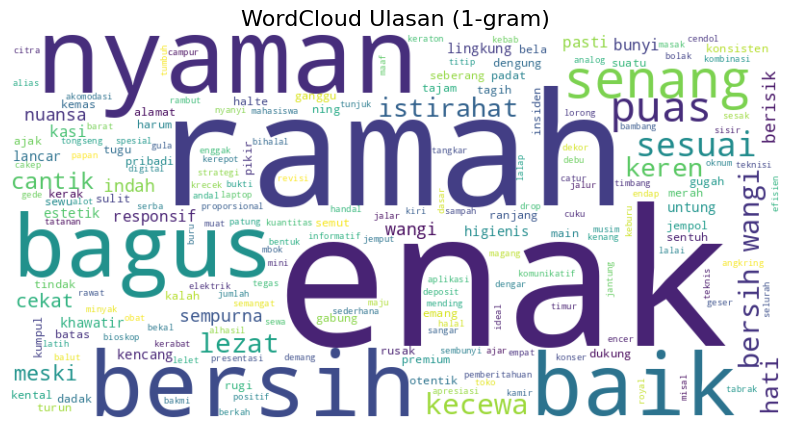

In [246]:
# N-Gram
show_wordcloud(all_words, "WordCloud Ulasan", 1)

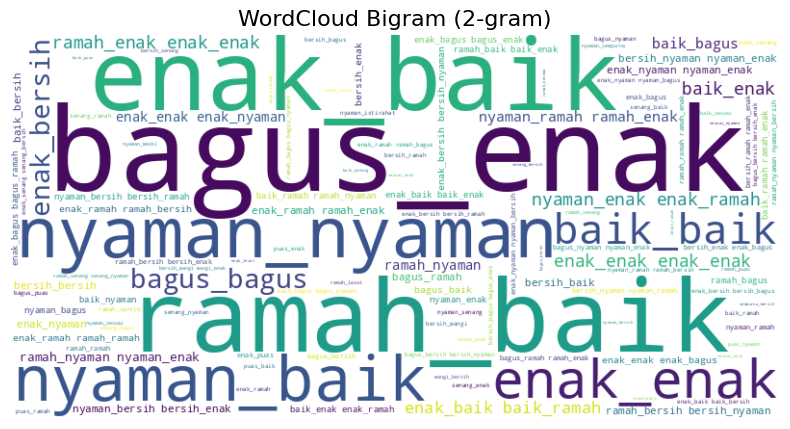

In [247]:
# Bigram
show_wordcloud(all_words, "WordCloud Bigram", 2)

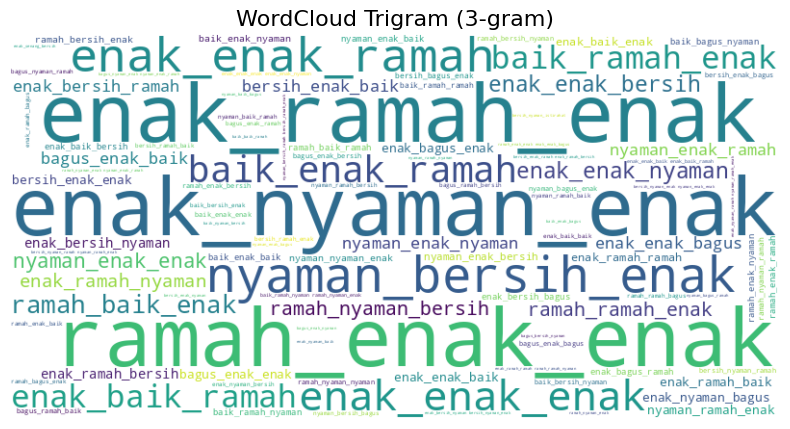

In [248]:
# Trigram
show_wordcloud(all_words, "WordCloud Trigram", 3)

In [ ]:
df[['review', 'token']].to_csv("final.csv", index=False, encoding="utf-8-sig")
print("\File hasil preprocessing disimpan sebagai: 'final.csv'")

\File hasil preprocessing disimpan sebagai: 'final.csv'


<>:2: SyntaxWarning: invalid escape sequence '\F'
<>:2: SyntaxWarning: invalid escape sequence '\F'
/tmp/ipython-input-1808921722.py:2: SyntaxWarning: invalid escape sequence '\F'
  print("\File hasil preprocessing disimpan sebagai: 'final.csv'")
